In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import math

Сгенерируем выборку объёма 1000 из логнормального распределения (с  𝜇=0  и  𝜎$^2$=1 ):

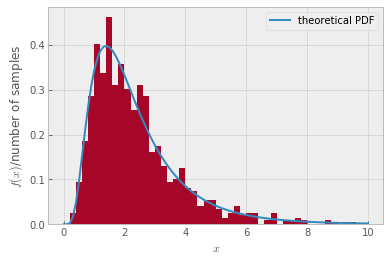

In [132]:
s = 0.6
func = sts.lognorm(s,scale=2)
sample = func.rvs(1000)#генерируем случайную выборку 1000 значений
x = np.linspace(0,10,100)#определяем массив точек для построения плотности распределения
pdf = func.pdf(x)#вычисляем значения плотности распределения от выборки

plt.style.use('bmh')
plt.plot(x, pdf, label='theoretical PDF')
plt.hist(sample, bins =50, range=(0,10), normed = True)
plt.ylabel('$f(x)$/number of samples')
plt.xlabel('$x$')
plt.legend(loc='best')

В качестве распределения я выбрал логнормальное распределение. Про него можно прочитать вот тут: https://ru.wikipedia.org/wiki/%D0%9B%D0%BE%D0%B3%D0%BD%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5
Вычислю значения дисперсии и среднего для нормального распределения

Из справочника lognorm scipy:
A common parametrization for a lognormal random variable Y is in terms of the mean, mu, and standard deviation, sigma, of the unique normally distributed random variable X such that exp(X) = Y. This parametrization corresponds to setting s = sigma and scale = exp(mu).

Значит sigma = 0.6, mu = 0.693

Заметим, что по центральной предельной теореме распределение выборочныых средних можно апроксиммировать нормальным распределением $~N({E}, \frac{D}{n})$
Где n - объем выборки

$${E} = {e}^{ {mu} + \frac{{sigma}^2}{2} }$$
$$ {D} = (e^{sigma^2} - 1){e}^{2{mu} + {sigma}^2}   $$

In [146]:
sigma = 0.6
mu = 0.693
E = math.exp(mu + ((sigma**2)/2.))
D = (math.exp(sigma**2.) - 1.)*math.exp(2.*mu + sigma**2.)
print E, D

2.39408233793 2.48368397672


Значит 

$${E} = 2.394$$

$${D} = 2.484$$


Сгенерирую 1000 списков объема 5 с помощью цикла for

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.01404213, 0.        , 0.        , 0.04212638,
        0.05616851, 0.01404213, 0.09829488, 0.12637914, 0.15446339,
        0.25275827, 0.32296891, 0.40722166, 0.49147442, 0.51955868,
        0.68806419, 0.60381143, 0.77231695, 0.51955868, 0.64593781,
        0.58976931, 0.54764293, 0.57572718, 0.57572718, 0.61785356,
        0.36509529, 0.46339017, 0.43530592, 0.36509529, 0.4774323 ,
        0.36509529, 0.18254764, 0.32296891, 0.2668004 , 0.22467402,
        0.28084253, 0.18254764, 0.19658977, 0.25275827, 0.14042126,
        0.15446339, 0.07021063, 0.07021063, 0.11233701, 0.04212638,
        0.04212638, 0.05616851, 0.07021063, 0.01404213, 0.04212638,
        0.04212638, 0.02808425, 0.02808425, 0.        , 0.01404213,
        0.01404213, 0.01404213, 0.01404213, 0.01404213, 0.        ]),
 array([0.        , 0.07142857, 0.14285714, 0.

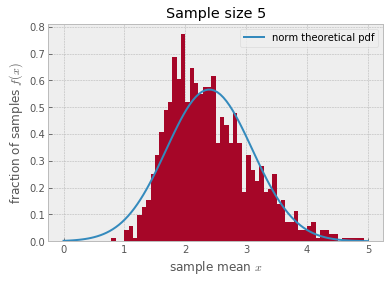

In [163]:
n = 5
sample5=[]#обозначим массив выборочных средних
for i in range(1000):
#     generator5 = func.rvs(n)
#     mean5 = sum(generator5)/n
#     sample5 = np.append(sample5,mean5)
    sample5.append(func.rvs(n).mean())

norm_rv = sts.norm(2.394, np.sqrt(2.484/n))    
x = np.linspace(0, 5, 100)
pdf = norm_rv.pdf(x)
# и вырисовывается на графике
plt.plot(x, pdf, label='norm theoretical pdf')

plt.legend()
plt.title("Sample size %d" % n)
plt.ylabel('fraction of samples $f(x)$')
plt.xlabel('sample mean $x$')

plt.style.use('bmh')
plt.hist(sample5, bins = 70, range=(0,5), normed = True)


Сгенерирую 1000 списков объема 25 с помощью цикла for

(array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.042, 0.028, 0.126, 0.28 , 0.336,
        0.518, 0.672, 0.994, 1.246, 1.246, 1.288, 1.33 , 1.302, 0.938,
        0.938, 0.686, 0.532, 0.406, 0.28 , 0.308, 0.154, 0.084, 0.084,
        0.098, 0.042, 0.014, 0.014, 0.   , 0.   , 0.014, 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ]),
 array([0.        , 0.07142857, 0.14285714, 0.21428571, 0.28571429,
        0.35714286, 0.42857143, 0.5       , 0.57142857, 0.64285714,
        0.71428571, 0.78571429, 0.85714286, 0.92857143, 1.        ,
        1.07142857, 1.14285714, 1.21428571, 1.28571429, 1.35714286,
        1.42857143, 1.5       , 1.57142857, 1.64285714, 1.71428571,
        1.78571429, 1.85714286, 1.92857143, 2.        , 2.07142857,
        2.14285714, 2.21428571, 2.28

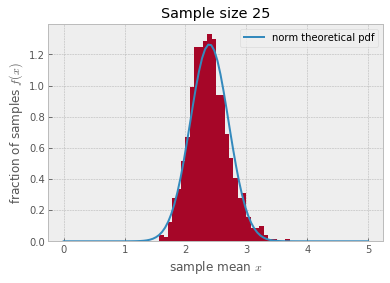

In [164]:
n = 25
sample25=np.array([])#обозначим массив выборочных средних
for i in range(1000):
    generator25 = func.rvs(n)
    mean25 = sum(generator25)/n
    sample25 = np.append(sample25,mean25)


norm_rv = sts.norm(2.394, np.sqrt(2.484/n))    
x = np.linspace(0, 5, 100)
pdf = norm_rv.pdf(x)
# и вырисовывается на графике
plt.plot(x, pdf, label='norm theoretical pdf')

plt.legend()
plt.title("Sample size %d" % n)
plt.ylabel('fraction of samples $f(x)$')
plt.xlabel('sample mean $x$')

plt.hist(sample25, bins = 70, range=(0,5), normed = True)


Сгенерирую 1000 списков объема 50 с помощью цикла for

(array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.154,
        0.336, 0.518, 0.672, 1.288, 1.652, 1.75 , 1.624, 1.638, 1.05 ,
        1.232, 0.91 , 0.616, 0.266, 0.112, 0.126, 0.042, 0.014, 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ]),
 array([0.        , 0.07142857, 0.14285714, 0.21428571, 0.28571429,
        0.35714286, 0.42857143, 0.5       , 0.57142857, 0.64285714,
        0.71428571, 0.78571429, 0.85714286, 0.92857143, 1.        ,
        1.07142857, 1.14285714, 1.21428571, 1.28571429, 1.35714286,
        1.42857143, 1.5       , 1.57142857, 1.64285714, 1.71428571,
        1.78571429, 1.85714286, 1.92857143, 2.        , 2.07142857,
        2.14285714, 2.21428571, 2.28

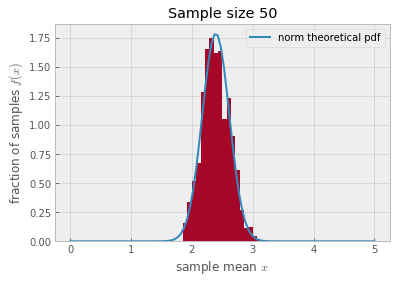

In [162]:
n = 50
sample50=np.array([])#обозначим массив выборочных средних
for i in range(1000):
    generator50 = func.rvs(n)
    mean50 = sum(generator50)/n
    sample50 = np.append(sample50,mean50)

norm_rv = sts.norm(2.394, np.sqrt(2.484/n))    
x = np.linspace(0, 5, 100)
pdf = norm_rv.pdf(x)
# и вырисовывается на графике
plt.plot(x, pdf, label='norm theoretical pdf')

plt.legend()
plt.title("Sample size %d" % n)
plt.ylabel('fraction of samples $f(x)$')
plt.xlabel('sample mean $x$')
    
plt.hist(sample50, bins = 70, range=(0,5), normed = True)


Как можно увидеть, распределение выборочных средних начинает сходиться к E = 2,484.
В силу особенности выбранного распределения (Логнормальное) наблюдается скошенность влево, тем не менее сходимость достигается достаточно быстро.